<div style="display: flex; width: 100%; justify-content: space-between;">
    <div style = "width: 100%;">
        <h1 style="font-family: verdana; font-weight: bold;">Sentiment Analysis - Twitter</h1>
        <p style="color: #159364; font-family: cursive;">Natural Language Processing - NLP</p>
    </div>
    <div style="text-align: right;">
        <img style="border-radius: 15px;" src="https://storage.googleapis.com/kaggle-datasets-images/1520310/2510249/62d9f449c80ece3e48827afd505f39de/dataset-cover.jpeg?t=2021-08-09-02-12-59" alt="Image Description" width="250" height="250">
    </div>
</div>


## **Importing libraries**

In [2]:
import spacy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


## **Explanation Data**

In [4]:
df.shape

(74681, 4)

In [5]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df.isna().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [8]:
df.duplicated().sum()

2700

## **Exploratory Data Analysis-(EDA)**

### **Sentiment Column**

In [9]:
df['Positive'].value_counts()

Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

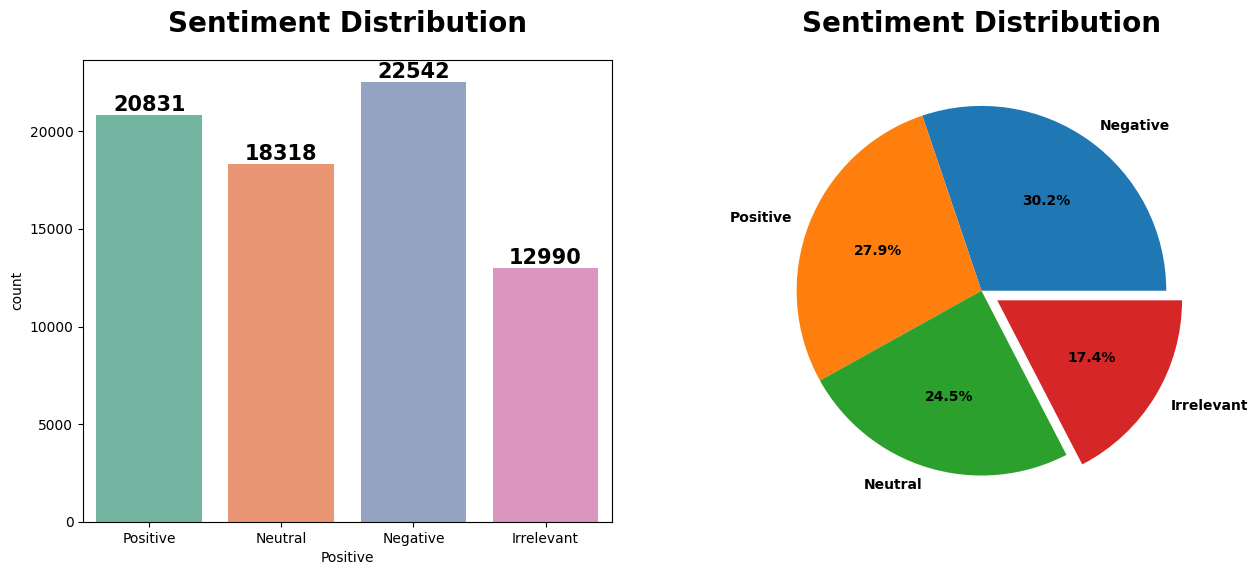

In [10]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Positive', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight = 'black', size = 15)
plt.title("Sentiment Distribution", fontweight = 'black', size = 20, pad = 20)


plt.subplot(1,2,2)
plt.pie(df['Positive'].value_counts(), autopct = '%1.1f%%', labels = df['Positive'].value_counts().index, explode = [0,0,0,0.1],colors=sns.set_palette("Set2"), textprops={"fontweight":"black"})
plt.title("Sentiment Distribution", fontweight = 'black', size = 20, pad = 20)

plt.show()

### **Borderlands Column**

In [11]:
df['Borderlands'].value_counts()

Borderlands
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)   

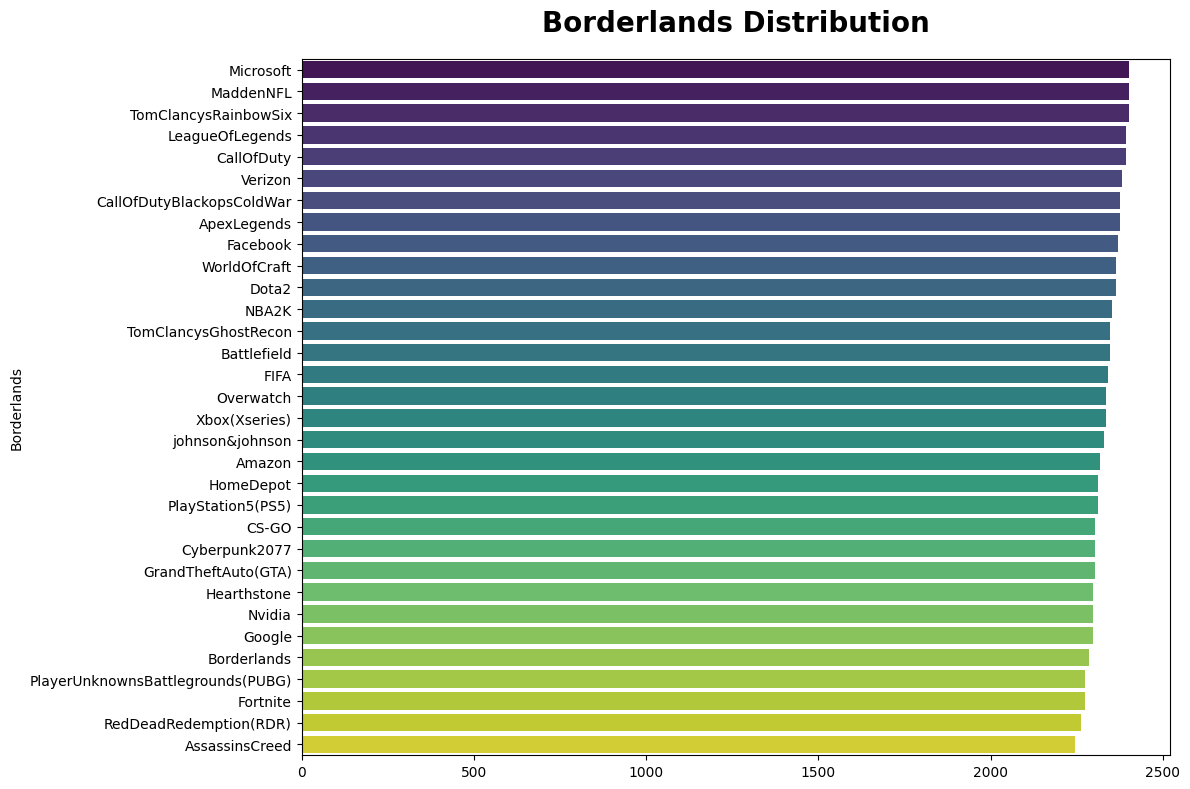

In [12]:
plt.figure(figsize = (12, 8))
sns.barplot(x = df['Borderlands'].value_counts().values, y = df['Borderlands'].value_counts().index, palette = 'viridis')
plt.title("Borderlands Distribution", fontweight = 'black', size = 20, pad = 20)

plt.tight_layout()
plt.show()

## **Data Preprocessing**

#### **Dealing With NULL Values**

In [13]:
df.dropna(inplace = True)

In [14]:
df.isna().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

In [15]:
nlp = spacy.load('en_core_web_sm')

In [16]:
def preprocessing(text):
    doc = nlp(text)
    cleaned_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue

        else:
            cleaned_tokens.append(token.lemma_)

    return " ".join(cleaned_tokens)

In [17]:
df['cleaned_text'] = df['im getting on borderlands and i will murder you all ,'].apply(preprocessing)

In [18]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",cleaned_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder


In [19]:
df['Combined_Text'] = df['cleaned_text'] + ' ' + df['Borderlands']

#### **Data Encoding**

In [20]:
encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['Positive'])

In [21]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",cleaned_text,Combined_Text,label
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill,come border kill Borderlands,3
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill,m get borderland kill Borderlands,3
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder,m come borderland murder Borderlands,3
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder,m get borderland 2 murder Borderlands,3
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder,m get borderland murder Borderlands,3


#### **Splitting Data**

In [22]:
X = df['Combined_Text']
y = df['label']

**Text Vectorizer**

In [23]:
tfidf = TfidfVectorizer()

X_vectorized = tfidf.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape

(59196, 28064)

In [26]:
y_train.shape

(59196,)

## **Train Model**

#### **Logistic Regression**

In [27]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr.score(X_train, y_train)

0.8451077775525373

In [29]:
y_pred = lr.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7783634029326306

<Axes: >

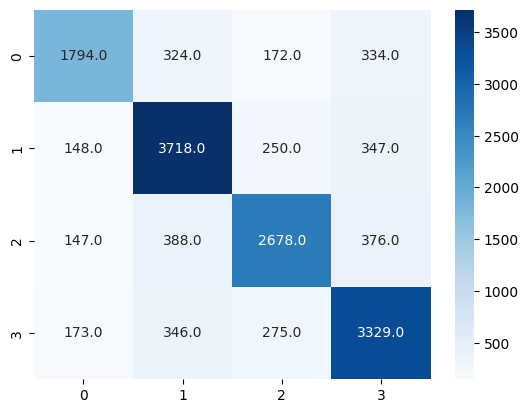

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2624
           1       0.78      0.83      0.80      4463
           2       0.79      0.75      0.77      3589
           3       0.76      0.81      0.78      4123

    accuracy                           0.78     14799
   macro avg       0.78      0.77      0.77     14799
weighted avg       0.78      0.78      0.78     14799



#### **Random Forest**

In [33]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rf.score(X_train, y_train)

0.9816203797553888

In [35]:
y_pred = rf.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9399959456720048

<Axes: >

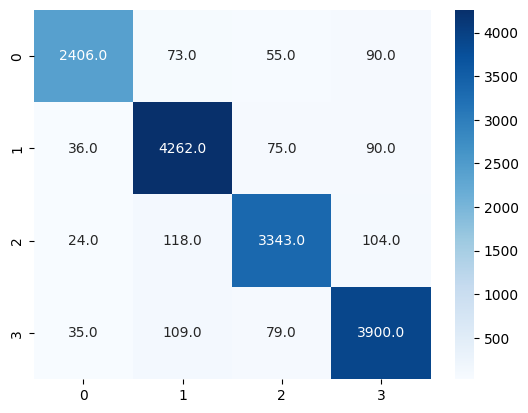

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2624
           1       0.93      0.95      0.94      4463
           2       0.94      0.93      0.94      3589
           3       0.93      0.95      0.94      4123

    accuracy                           0.94     14799
   macro avg       0.94      0.94      0.94     14799
weighted avg       0.94      0.94      0.94     14799



In [51]:
import joblib
joblib.dump(rf, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [52]:
import shutil

# اضغط الموديل في ملف ZIP
shutil.make_archive("model_backup", 'zip', ".", "sentiment_model.pkl")

'/kaggle/working/model_backup.zip'